$Torque Mecanico$

In [137]:
import csv

# Nombre del archivo CSV
archivo_csv = "mecanico.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "Peso(gm)": [50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 400.0]
Columna "Angulo equilibrio(rad)": [3.05, 3.08, 3.11, 3.13, 3.15, 3.17, 3.19]
Columna "Torque": [0.0074088, 0.0148176, 0.0222264, 0.0296352, 0.037044, 0.0444528, 0.0592704]


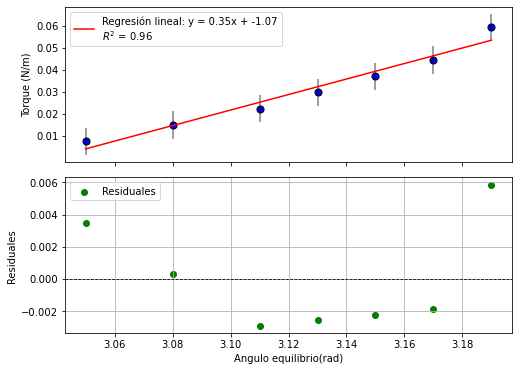

Incertidumbre de la pendiente: 0.03


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('mecanico.csv')

# Especifica las columnas que deseas graficar
x_column = 'Angulo equilibrio(rad)'
y_column = 'Torque'

# Extraer los valores de las columnas
x = data[x_column]
y = data[y_column]

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Calcular los valores predichos
predicted_y = slope * x + intercept

# Calcular los residuales
residuals = y - predicted_y

# Calcular las barras de error basadas en los residuales
error_bars = 1.96 * np.std(residuals)  # 95% intervalo de confianza

# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Gráfico de los datos y la regresión lineal en el subgráfico superior
ax1.scatter(x, y, label='Datos (Puntos Azules)', color='blue', marker='o', edgecolor='black', s=50)
ax1.plot(x, predicted_y, color='red', label=f'Regresión lineal: y = {slope:.2f}x + {intercept:.2f}')
ax1.set_ylabel('Torque (N/m)')  # Cambia el nombre del eje y
ax1.set_yticks(np.arange(0.01, 0.07, 0.01))  # Establece los valores en el eje y
ax1.legend(loc='upper left')
legend_text = f'Regresión lineal: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value ** 2:.2f}'
ax1.legend([legend_text], loc='upper left')

# Mostrar las barras de error en cada dato
for i in range(len(x)):
    ax1.errorbar(x[i], y[i], yerr=error_bars, fmt='none', color='black', alpha=0.5)

# Gráfico de los residuales en el subgráfico inferior
ax2.scatter(x, residuals, label='Residuales', color='green')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Línea horizontal en 0
ax2.set_xlabel(x_column)
ax2.set_ylabel('Residuales')
ax2.legend(loc='upper left')

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(hspace=0.1)

# Mostrar el gráfico
plt.grid()
plt.show()
print(f'Incertidumbre de la pendiente: {std_err:.2f}')

$Momento Inercial$

In [123]:
import csv

archivo_csv = "inercia.csv"

columnas = {}

with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    
    
    encabezados = next(reader)
    
   
    for encabezado in encabezados:
        columnas[encabezado] = []

    
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)


for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "(T/2pi)^2": [0.034, 0.039, 0.043, 0.047, 0.054]
Columna "N de latones": [0.0, 1.0, 2.0, 3.0, 4.0]
Columna "Periodo(s)": [1.16, 1.24, 1.3, 1.36, 1.46]


In [124]:
Y = columnas["(T/2pi)^2"] #s^2
Y

[0.034, 0.039, 0.043, 0.047, 0.054]

In [125]:
X = columnas["N de latones"] # adimensional
X

[0.0, 1.0, 2.0, 3.0, 4.0]

In [126]:
import numpy as np

# Datos
T_over_2pi_squared = np.array([0.034, 0.039, 0.043, 0.047, 0.054])
T_s = np.array([1.16, 1.24, 1.30, 1.36, 1.46])

# Calcular las barras de error para (T/2π)^2
error_Y = np.abs(2 * T_over_2pi_squared / T_s)  # Fórmula de propagación de errores

# Mostrar las barras de error calculadas
print("Barras de error para (T/2π)^2:", error_Y)


Barras de error para (T/2π)^2: [0.05862069 0.06290323 0.06615385 0.06911765 0.0739726 ]


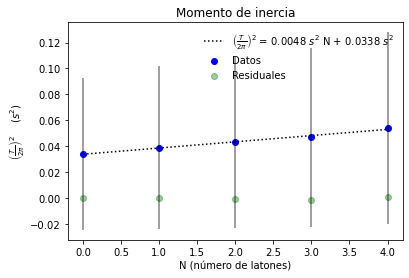

La incertidumbre en el pendiente es de 0.0003 s^2
La incertidumbre en el intercepto es de 0.0007 s^2


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Barras de error en el eje y (ajusta estos valores según tus datos reales)
error_Y = np.array([0.05862069, 0.06290323, 0.06615385, 0.06911765, 0.0739726])

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = r"$\left(\frac{T}{2\pi}\right)^2$"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales = [y - ((slope * x) + intercept) for x, y in zip(X, Y)]

# Crear la gráfica
plt.scatter(X, Y, label='Datos', color='blue')
# Agregar barras de error en el eje y
plt.errorbar(X, Y, yerr=error_Y, fmt='none', color='black', alpha=0.5)
plt.plot(X, regression_line, label=f'{Label} = {slope:.4f} $s^2$ N + {intercept:.4f} $s^2$', color='black', linestyle='dotted')
plt.scatter(X, residuales, label='Residuales', alpha=0.4, color='green')

plt.xlabel('N (número de latones)')
plt.ylabel(r'$\left(\frac{T}{2\pi}\right)^2 \; \; \; \; \; (s^2)$')
plt.title('Momento de inercia')
legend = plt.legend()
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda

# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m,4)} s^2")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)} s^2")



In [46]:
import sympy as sp

def propagacion_de_error(expr, variables, errores):
    """
    Calcula el error propagado para una expresión dada utilizando el método de derivadas parciales.
    """
    symbols = sp.symbols(variables)
    expr = sp.sympify(expr)
    
    derivadas = [sp.diff(expr, var) for var in symbols]
    error_propagado = sp.sqrt(sum([(derivada * error)**2 for derivada, error in zip(derivadas, errores)]))
    
    return error_propagado.evalf()

In [119]:
r = 2.33E-2 #Radio interno del disco en m
dr = 1.00E-4 #Incertidumbre en el radio interno del disco en m

R= 4.60E-2 #Radio externo del disco en m
dR = 1.00E-4 #Incertidumbre en el radio externo del disco en m

M = 212.0E-3 #Masa del disco en Kg
dM = 0.1E-3 #Incertidumbre en la masa del disco en Kg

#Propagacion de error del momento de inercia de un disco DI

DI = (1/2)*(M)*(r**2 + R**2) #Momento de inercia de un disco en Kg m^2
pre_prop_DI = "(1/2)*(M)*(r**2 + R**2)"
var_DI = ['M', 'r', 'R']
errs_DI = [dM, dr, dR]
prop_DI = propagacion_de_error(pre_prop_DI, var_DI, errs_DI)
print(DI)
prop_DI


0.00028184233999999997


0.0001*(M**2*R**2 + M**2*r**2 + 0.25*(R**2 + r**2)**2)**0.5

In [120]:
#Inecetidumbre en el momento de inercia de un disco en Kg m^2
dDI = 0.0001 * np.sqrt((M*R)**2 + (M*r)**2 + 0.25*(r**2 + R**2)**2)

print(round(DI,6),round(dDI,6))

0.000282 1e-06


In [129]:
#Propagacion de error del momento de inercia inicial

I = b*k #Momento de inercia inicial en Kg m^2
pre_prop_I = "b*k"
var_I = ['b', 'k']
errs_I = [db, dk]
prop_I = propagacion_de_error(pre_prop_I, var_I, errs_I)

prop_I

0.00245649797074292*(b**2 + 0.0812013520592795*k**2)**0.5

$Momento Magnetico$

In [130]:
import csv

# Nombre del archivo CSV
archivo_csv = "magnetico.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "Corriente(A)": [0.25, 0.37, 0.5, 0.63, 0.75, 0.88, 1.0]
Columna "angulo en equilibrio (rad)": [3.18, 3.25, 3.32, 3.4, 3.46, 3.52, 3.58]


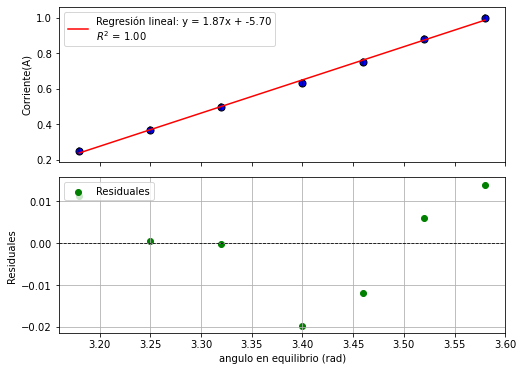

Incertidumbre de la pendiente: 0.04


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('magnetico.csv')

# Especifica las columnas que deseas graficar
x_column = 'angulo en equilibrio (rad)'
y_column = 'Corriente(A)'

# Extraer los valores de las columnas
x = data[x_column]
y = data[y_column]

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Calcular los valores predichos
predicted_y = slope * x + intercept

# Calcular los residuales
residuals = y - predicted_y

# Calcular las barras de error basadas en los residuales
error_bars = 1.96 * np.std(residuals)  # 95% intervalo de confianza

# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Gráfico de los datos y la regresión lineal en el subgráfico superior
ax1.scatter(x, y, label='Datos (Puntos Azules)', color='blue', marker='o', edgecolor='black', s=50)
ax1.plot(x, predicted_y, color='red', label=f'Regresión lineal: y = {slope:.2f}x + {intercept:.2f}')
ax1.set_ylabel('Corriente(A)')  # Cambia el nombre del eje y
ax1.set_yticks(np.arange(0, 2, 0.2))  # Establece los valores en el eje y
ax1.legend(loc='upper left')
legend_text = f'Regresión lineal: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value ** 2:.2f}'
ax1.legend([legend_text], loc='upper left')

# Mostrar las barras de error en cada dato
for i in range(len(x)):
    ax1.errorbar(x[i], y[i], yerr=error_bars, fmt='none', color='black', alpha=0.5)

# Gráfico de los residuales en el subgráfico inferior
ax2.scatter(x, residuals, label='Residuales', color='green')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Línea horizontal en 0
ax2.set_xlabel(x_column)
ax2.set_ylabel('Residuales')
ax2.legend(loc='upper left')

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(hspace=0.1)

# Mostrar el gráfico
plt.grid()
plt.show()
print(f'Incertidumbre de la pendiente: {std_err:.2f}')

In [150]:
import pandas as pd
import numpy as np

# Crear un DataFrame con los datos
data = pd.DataFrame({
    'Corriente(A)': [0.25, 0.37, 0.5, 0.63, 0.75, 0.88, 1],
    'angulo en equilibrio (rad)': [3.18, 3.25, 3.32, 3.4, 3.46, 3.52, 3.58]
})

# Valor conocido de la constante de torsión (k) en N*m/A
k = 0.058  # N*m/A

# Extraer los valores de corriente y ángulo
corrientes = data['Corriente(A)']
angulos = data['angulo en equilibrio (rad)']

# Calcular el momento magnético para cada par de corriente y ángulo
momentos_magneticos = k * corrientes * angulos

# Calcular el promedio del momento magnético
promedio_momento_magnetico = np.mean(momentos_magneticos)

# Imprimir el momento magnético para cada par de corriente y ángulo
for i, corriente in enumerate(corrientes):
    angulo = angulos[i]
    momento_magnetico = momentos_magneticos[i]
    print(f'Corriente: {corriente} A, Ángulo: {angulo} rad, Momento Magnético: {momento_magnetico:.2f} Am²')

# Imprimir el promedio del momento magnético del oscilador
print(f'Promedio del Momento Magnético del Oscilador: {promedio_momento_magnetico:.2f} Am²')


Corriente: 0.25 A, Ángulo: 3.18 rad, Momento Magnético: 0.05 Am²
Corriente: 0.37 A, Ángulo: 3.25 rad, Momento Magnético: 0.07 Am²
Corriente: 0.5 A, Ángulo: 3.32 rad, Momento Magnético: 0.10 Am²
Corriente: 0.63 A, Ángulo: 3.4 rad, Momento Magnético: 0.12 Am²
Corriente: 0.75 A, Ángulo: 3.46 rad, Momento Magnético: 0.15 Am²
Corriente: 0.88 A, Ángulo: 3.52 rad, Momento Magnético: 0.18 Am²
Corriente: 1.0 A, Ángulo: 3.58 rad, Momento Magnético: 0.21 Am²
Promedio del Momento Magnético del Oscilador: 0.12 Am²
